<a href="https://colab.research.google.com/github/JuhiNayak/Machine-Learning/blob/master/LinearRegression_FractalClustering_JuhiNayak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 257: Assignment Week 3
Author: Juhi Nayak

Applying Linear Regression and Fractal Clustering on list of available features such as total income, education, purpose, etc.

Dataset Source: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv


## Linear Regression

### Importing Libraries

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls ./drive/My\ Drive/datasets/loan-prediction

lending-club	   test_Y3wMUE5_7gLdaTN.csv
SPSS_loan_roc.sav  train_u6lujuX_CVtuZ9i.csv


### Read Data

In [ ]:
path = "/content/drive/My Drive/datasets/loan-prediction/train_u6lujuX_CVtuZ9i.csv"
df_Loan = pd.read_csv(path)
df_Loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
path = "/content/drive/My Drive/datasets/loan-prediction/test_Y3wMUE5_7gLdaTN.csv"
df_test = pd.read_csv(path)
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Data Preparation

In [ ]:
# Change the Loan Status Nominal values to numeric value
df_Loan['Loan_Status'] = df_Loan['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
df_Loan.shape

(614, 13)

In [ ]:
df_Loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


Removing Null values

In [ ]:
df_Loan.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


### Applying linear regression to predict the loan approval based on applicant income

#### Plotting the graphs

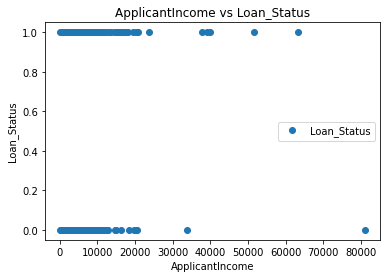

In [ ]:
df_Loan.plot(x='ApplicantIncome', y='Loan_Status', style='o')  
plt.title('ApplicantIncome vs Loan_Status')  
plt.xlabel('ApplicantIncome')  
plt.ylabel('Loan_Status')  
plt.show()

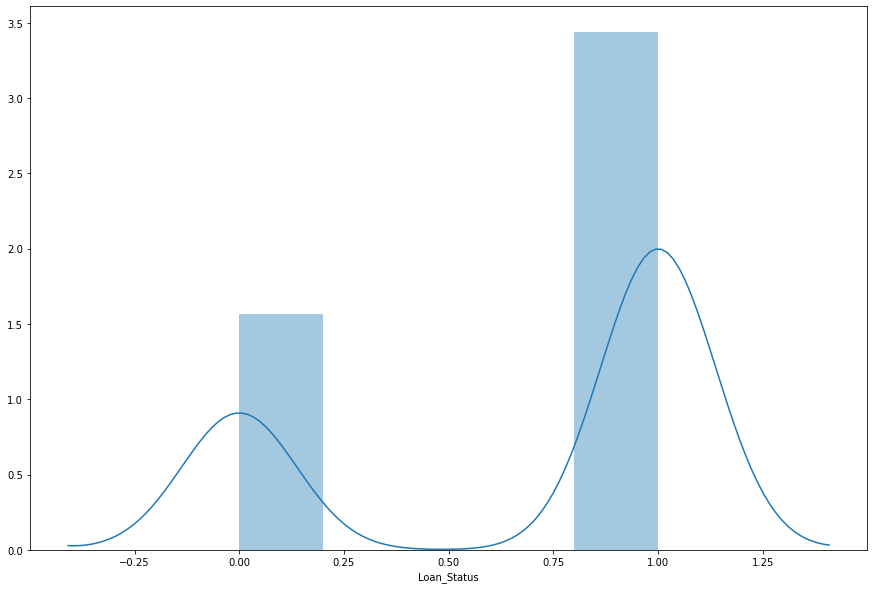

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_Loan['Loan_Status'])

#### Training the Model

In [ ]:
Z = df_Loan.loc[(df_Loan['ApplicantIncome']>=0),['ApplicantIncome']]
# print(Z);

X = Z['ApplicantIncome'].values.reshape(-1,1)
y = df_Loan['Loan_Status'].values.reshape(-1,1)
# print(X, y)

Data Splitting in the ratio 80:20 for training:test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Calculate the interceot and slop of our dataset throigh linear regression

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.67654945]
[[-6.73368561e-08]]


Perform predection on test data

In [ ]:
y_pred = regressor.predict(X_test)

Test data comparision of output for X_test with predicted values

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1,0.676072
1,0,0.676265
2,1,0.676136
3,0,0.676258
4,1,0.676367
...,...,...
118,1,0.676381
119,1,0.675960
120,1,0.675567
121,0,0.676351


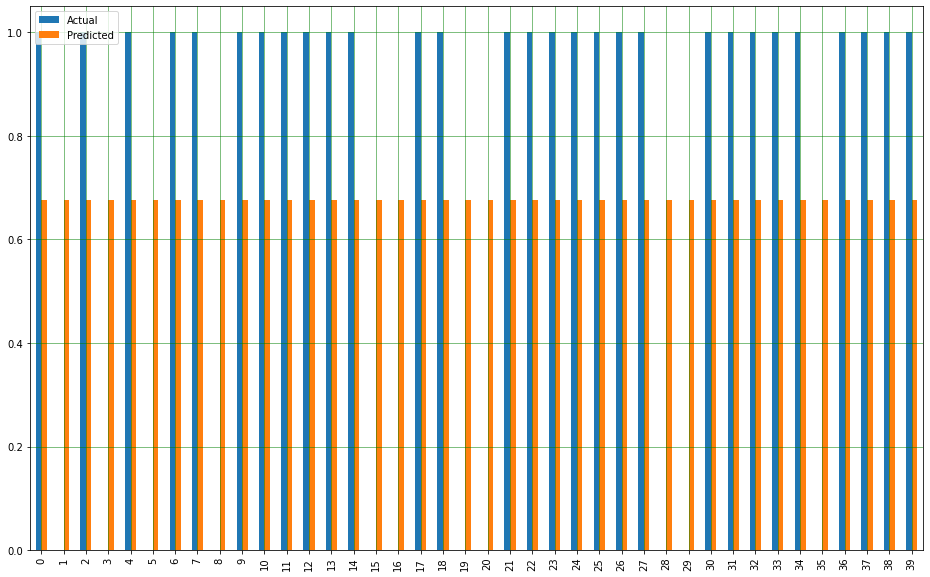

In [ ]:
df1 = df.head(40)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Evaluate performance

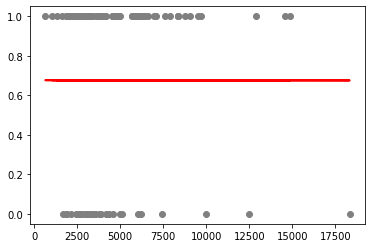

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.41832524419098976
Mean Squared Error: 0.19938706662011993
Root Mean Squared Error: 0.446527789303331



### Applying linear regression to predict the loan amount based on applicant income

#### Plotting the graphs

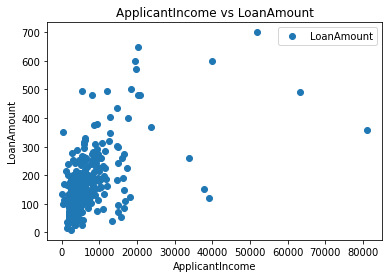

In [ ]:
df_Loan.plot(x='ApplicantIncome', y='LoanAmount', style='o')  
plt.title('ApplicantIncome vs LoanAmount')  
plt.xlabel('ApplicantIncome')  
plt.ylabel('LoanAmount')  
plt.show()

through the plot we observe that the average loan amount is nearly between 70 and 140

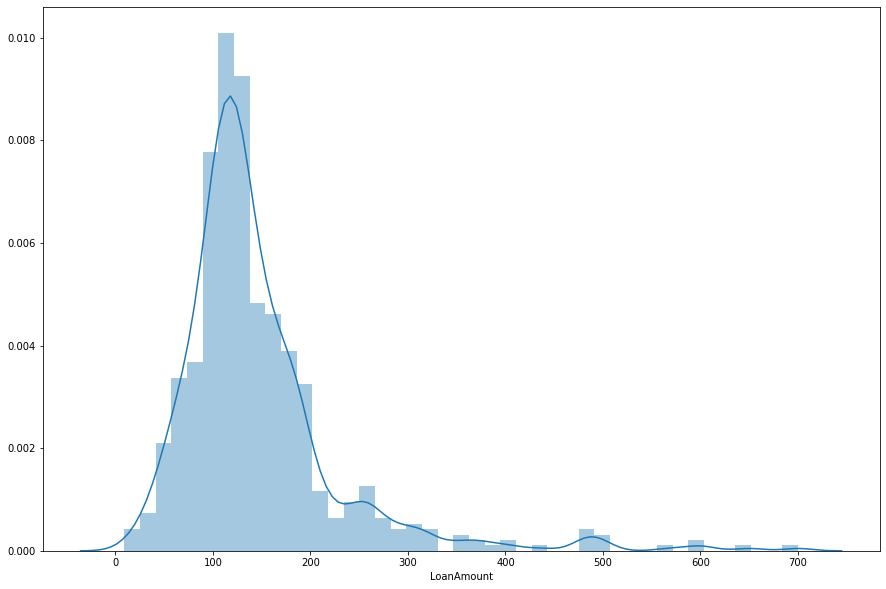

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_Loan['LoanAmount'])

#### Training the Model

In [ ]:
Z = df_Loan.loc[(df_Loan['ApplicantIncome']>=0) & (df_Loan['LoanAmount']>=0),['ApplicantIncome','LoanAmount']]
Z_test = df_test.loc[(df_test['ApplicantIncome']>=0) & (df_test['LoanAmount']>=0),['ApplicantIncome','LoanAmount']]
print(Z);

X_train = Z['ApplicantIncome'].values.reshape(-1,1)
y_train = Z['LoanAmount'].values.reshape(-1,1)
X_test = Z_test['ApplicantIncome'].values.reshape(-1,1)
y_test = Z_test['LoanAmount'].values.reshape(-1,1)

     ApplicantIncome  LoanAmount
1               4583       128.0
2               3000        66.0
3               2583       120.0
4               6000       141.0
5               5417       267.0
..               ...         ...
609             2900        71.0
610             4106        40.0
611             8072       253.0
612             7583       187.0
613             4583       133.0

[592 rows x 2 columns]


In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Calculate the intercept and slope for our dataset

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[103.57226944]
[[0.007927]]


Performing Prediction on test data

In [ ]:
y_pred = regressor.predict(X_test)

Test data comparision of output for X_test with predicted values

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,110.0,148.914682
1,126.0,127.955707
2,208.0,143.207246
3,100.0,122.121438
4,78.0,129.541106
...,...,...
357,113.0,135.351594
358,115.0,136.532716
359,126.0,129.335004
360,158.0,143.207246


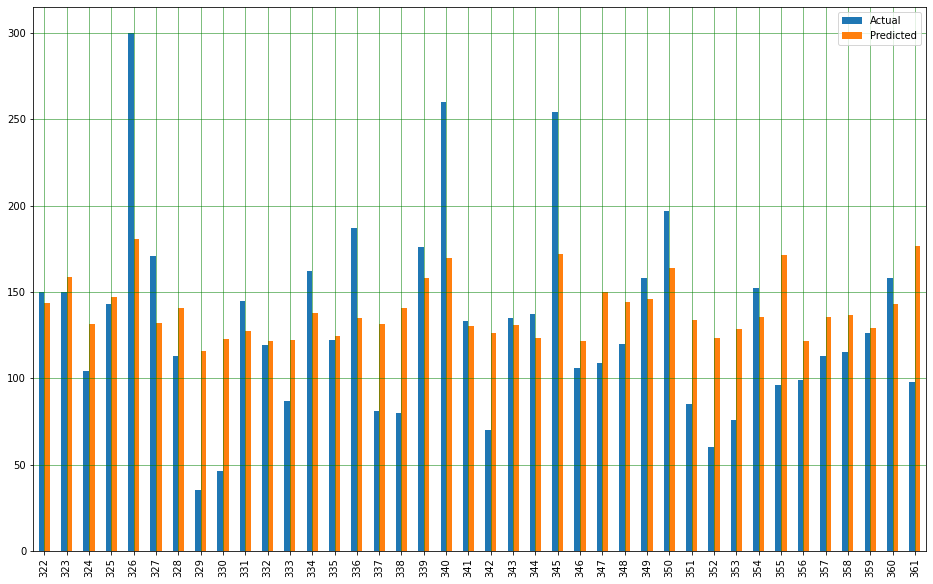

In [ ]:
df1 = df.tail(40)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Evaluate performance

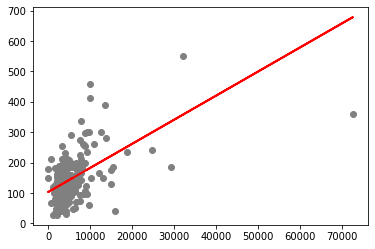

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 37.82278735759043
Mean Squared Error: 2943.2536651649634
Root Mean Squared Error: 54.25176186231156


## Fractal Clustering

### Improt Libraries

In [ ]:
from sklearn.cluster import KMeans
import datetime 
from dateutil.relativedelta import relativedelta

pd.set_option('display.max_columns', 100)

### Data Cleaning for missing values

In [ ]:
df_Loan.fillna(df_Loan.mean(), inplace=True)
df_Loan.isna().sum()
df_Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Conversion to numerical values

In [ ]:
loanstatus_dict = {}
loanstatus = np.unique(df_Loan['Loan_Status']).tolist()
for i in range(len(loanstatus)):
        loanstatus_dict[loanstatus[i]] = i
df_Loan['Numeric_Loan_Status'] = [loanstatus_dict[l] for l in df_Loan['Loan_Status']]

property_dict = {}
property = np.unique(df_Loan['Property_Area']).tolist()
for i in range(len(property)):
        property_dict[property[i]] = i
df_Loan['Numeric_Property_Area'] = [property_dict[l] for l in df_Loan['Property_Area']]

df_Loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Numeric_Loan_Status,Numeric_Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,2
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,2
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,2
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,2


### SSE and Silhouette score

Evaluated performance of various number of clusters using K-Means.
Performance is evaluated by within cluster SSE and silhouette score.

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[13,14]]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (11). Possibly due to duplicate points in X.
/usr/local/lib/python3.6/dist-packages/ipyk

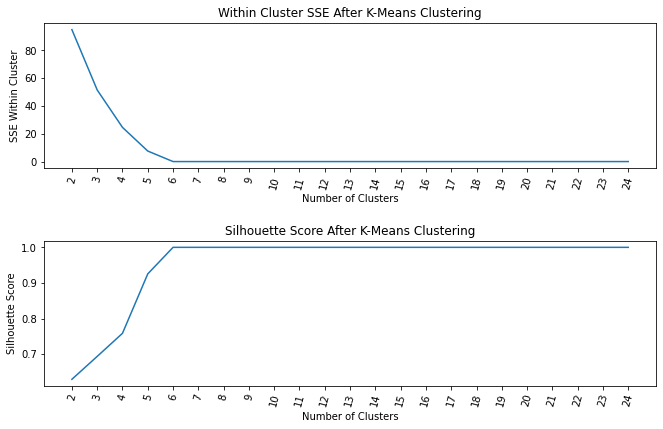

In [ ]:
plot_cluster(df_Loan, max_loop=25)

From SSE and Silhouette score, We found that the optimal number clusters are 2. 

In [ ]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,[13,14]]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

### First Trial with 2 clusters

In [ ]:
first_trial = apply_cluster(df_Loan, clusters=2)

clustering performance
-----------------------------------
silhouette score: 0.63
sse withing cluster: 95.0


In [ ]:

cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"Numeric_Property_Area":"mean", "Numeric_Loan_Status":"mean"})
    .sort_values('Numeric_Property_Area')
    .reset_index()
)

cluster_perf_df

,cluster,Numeric_Property_Area,Numeric_Loan_Status
0,0,1.000000,0
1,1,1.054502,1


Chose cluster 0 for fractal clustering having loan_status as upapproved.

In [ ]:
df_sub = df_Loan.query("cluster == 0").reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
/usr/local/lib/python3.6/dist-packages/ipyker

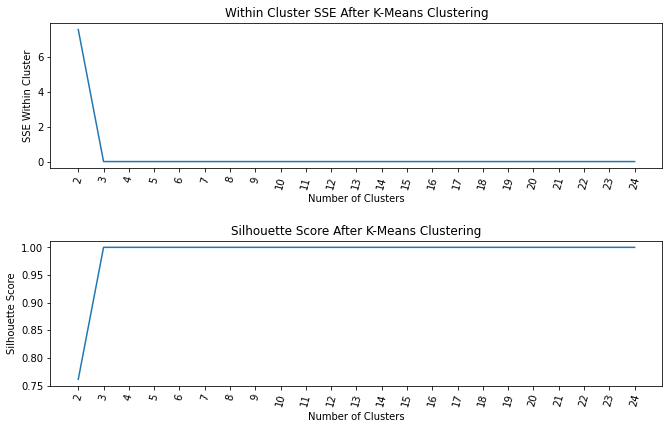

In [ ]:
plot_cluster(df_sub, max_loop=25)

### Second Trial
From SSE and silhouette score, we found that the cluster 0 can be divided into 3 more clusters.

So Second trial on cluster 0 with 3 clusters.

In [ ]:
second_trial= apply_cluster(df_sub, clusters=3)

clustering performance
-----------------------------------
silhouette score: 1.0
sse withing cluster: 0.0


In [ ]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"Numeric_Property_Area":"mean", "Numeric_Loan_Status":"mean"})
    .sort_values('Numeric_Property_Area')
    .reset_index()
)

sub_cluster_perf_df

,cluster,Numeric_Property_Area,Numeric_Loan_Status
0,2,0,0
1,0,1,0
2,1,2,0


In [ ]:
best_sub_cluster = second_trial.query("cluster == 2")
best_sub_cluster

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Numeric_Loan_Status,Numeric_Property_Area,cluster
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.000000,Rural,N,0,0,2
3,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.000000,Rural,N,0,0,2
5,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.000000,Rural,N,0,0,2
8,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.000000,Rural,N,0,0,2
13,LP001097,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.000000,Rural,N,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,LP002837,Male,Yes,3+,Graduate,No,3400,2500.0,123.0,360.0,0.000000,Rural,N,0,0,2
182,LP002898,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,0.842199,Rural,N,0,0,2
183,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.000000,Rural,N,0,0,2
184,LP002912,Male,Yes,1,Graduate,No,4283,3000.0,172.0,84.0,1.000000,Rural,N,0,0,2


We found cluster 2 as our golden cluster.

Conclusion: People from rural area had maximum number of unapproved loans.